# PROJET  LICORNE 

## Contexte du projet 

La BPI France dispose d'un fond d'investissement qu'elle voudrait utiliser pour investir dans les start'up 
de demain les plus prometteuses . Seulement elle ne sait pas comment les sélectionner. Faut -il investir dans 
celles qui dépensent le plus en marketing ? en recherche et développement ? Dans quelles villes les startups semblent 
mieux opérer? Elle fait donc appel à vous pour y voir plus clair...

 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Briefing**
 <p style="color:#4caba9;">Vous devez donc concevoir un modèle de régression linéaire multiple qui permettra à la BPI d'une part de sélectionner <strong>les 5 start'up les plus prometteuses</strong> et d'autre part de déterminer dans quel(s) <strong>secteur(s) il serait le plus judicieux de répartir les budgets de dépenses</strong>. Le livrable se présentera sous forme d'un notebook python ET d'un rapport écrit synthétisant votre démarche de travail que vous justifierez par les résultats des différentes analyses que vous aurez effectuées. Vous comparerez vos résultats à ceux obtenus par le logiciel GRETL.</p>

 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Etapes de construction d’un modèle**
 <p style="color:#FF00FF;"> 
✔ Importer les données <br>
✔ Séparation des données en sous ensemble d’entraînement et un sous ensemble de test. <br>
✔ construction du modèle <br>
✔ Entrainement du modèle avec le sous ensemble d'entraînement<br>
✔ Prédictions <br>
✔ Evaluation du modèle <br>
</p>

## import des librairies nécessaires 

In [4]:
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

#Widgets
from ipywidgets import widgets  
from IPython.display import display

%matplotlib inline

## visualisation et description du jeu de données 

In [5]:
df = pd.read_csv(r'C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\2120d261-1446-43e8-b0eb-a681e66d738a.csv',sep =';')
df.head()

,R&D,Administration,Marketing,villes,Profit
0,165349.20,136897.80,471784.10,Paris,192261.83
1,162597.70,151377.59,443898.53,Strasbourg,191792.06
2,153441.51,101145.55,407934.54,Lyon,191050.39
3,144372.41,118671.85,383199.62,Paris,182901.99
4,142107.34,91391.77,366168.42,Lyon,166187.94


In [14]:
#on renomme la colonne R&D en R_D pour éviter les problèmes de lecture
df.rename(columns ={'R&D': 'R_D'}, inplace =True)

## création d'un rapport avec pandas profiling

In [4]:
#pip install pandas_profiling
from pandas_profiling import ProfileReport
df = pd.read_csv(r'C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\2120d261-1446-43e8-b0eb-a681e66d738a.csv',sep =';')

In [5]:
prof = ProfileReport(df)
prof.to_file(output_file='rapport.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# vérification de nombres de colonnes et de lignes ds la df
df.shape

print("Il y a", df.shape[0], "entités dans le jeu de donnees")
print("Il y a",df.shape[0], "lignes et", df.shape[1], "colonnes")

Il y a 50 entités dans le jeu de donnees
Il y a 50 lignes et 5 colonnes


In [5]:
df.columns

Index(['R_D', 'Administration', 'Marketing', 'villes', 'Profit'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R_D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   villes          50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R_D,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### comparaison avec Gretl

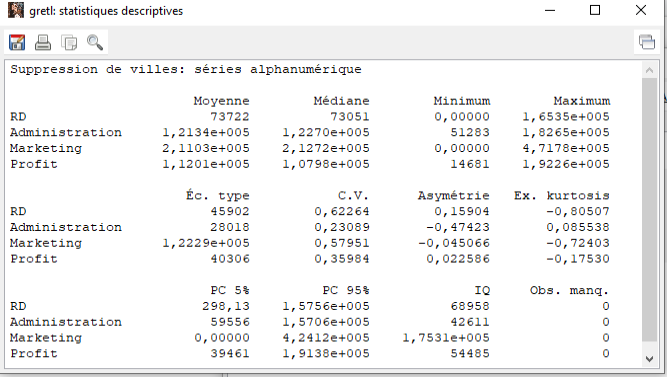

In [1]:
from IPython.display import Image
Image(r"C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\stat_gretel.png")

# cv cross value 

In [7]:
df.describe(include='all')
# (df.describe(include = 'all') pour avoir toutes les colonnes!)
# permet d'imprimer les stats sur toutes les colonnes (numériques ou non)

,R_D,Administration,Marketing,villes,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,Paris,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


###  heatmap        
On affiche la matrice sous forme de carte thermique (heatmap)

 coor() Elle est utilsée pour  appliquer la formule de la corrélation de Pearson sur des données. 
        Elle peut aussi bien être appliquée à une DataFrame dans son ensemble qu'à une colonne pour la comparer à une autre. 
        Par défaut, la méthode "corr()" sans paramètre s'applique à la DataFrame entière.Elle va retourner un DataFrame dans    lequel toutes les colonnes sont comparées. Seules les données numériques sont sélectionnées pour le calcul des corrélations.


In [21]:
df.corr() 

,R_D,Administration,Marketing,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

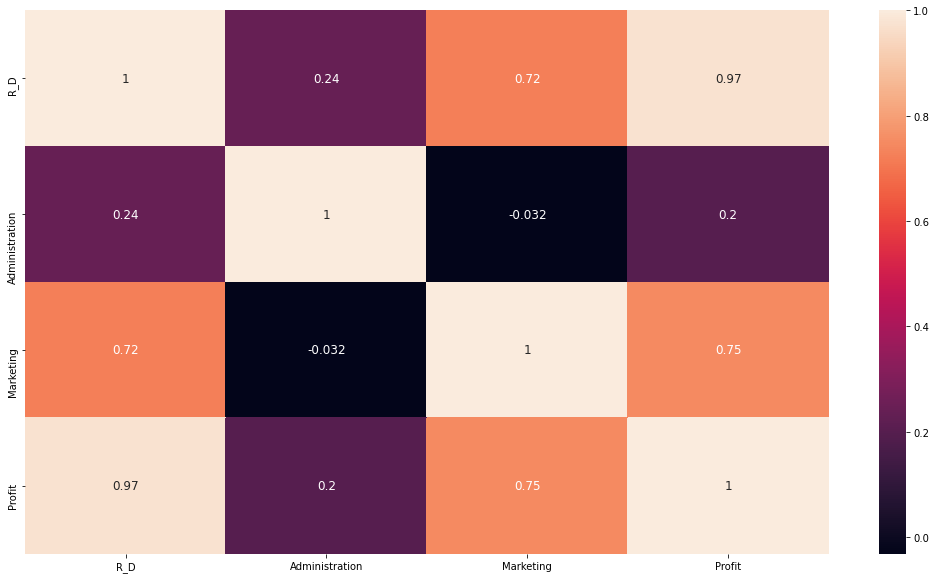

In [22]:
# visualisation de la correlation des valeurs, plus c'est proche de 1 plus c'est coorélé.
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), annot = True, annot_kws={'size':12})

#annot_kwsdict of key, value mappings, optional
#Keyword arguments for matplotlib.axes.Axes.text() when annot is True.

Une relation linéaire positive existe entre les variables: Marketing et R&D , Profit et R&D et Profit et Marketing. Pour ces paires, les coefficients de corrélation de Pearson sont les suivants :

Marketing et R&D 0.72424 <br>
Profit et R&D 0.972900 <br>
Profit et Marketing 0.747766 <br>

### pairplot 

pairplot produit une figure sur laquelle on peut voir TOUTES les relations entre nos différentes variables !

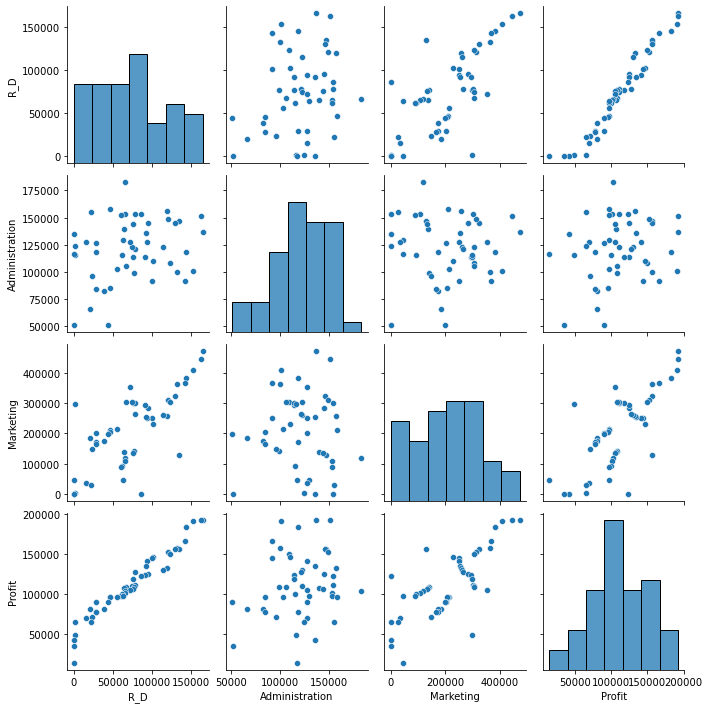

In [23]:
sns.pairplot(df)

In [24]:
df.columns

Index(['R_D', 'Administration', 'Marketing', 'villes', 'Profit'], dtype='object')

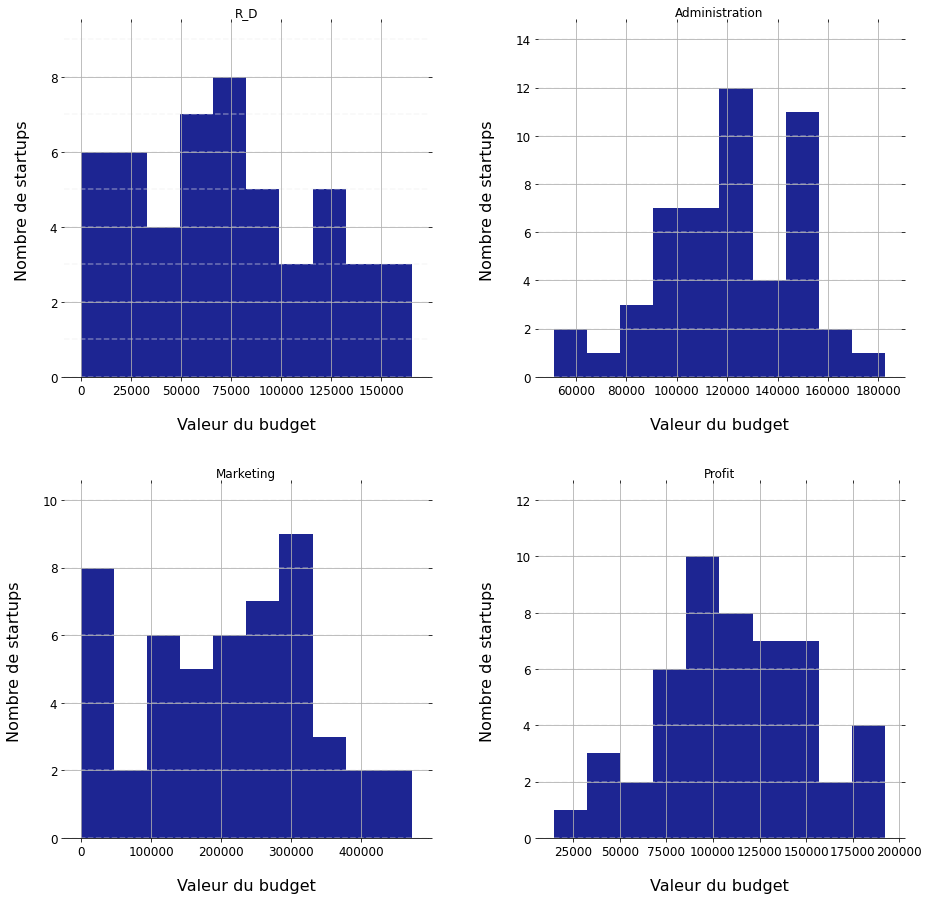

In [25]:
ax=df.hist(figsize=(15,15), layout=(2,2), color='#1d2592', xlabelsize=12, ylabelsize=12, density=False);

for x in ax[0]:
        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

    # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Set x-axis label
        x.set_xlabel("Valeur du budget", labelpad=20, weight='normal', size=16)

            # Set y-axis label
        x.set_ylabel("Nombre de startups", labelpad=20, weight='normal', size=16)
        
for x in ax[1]:
        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
            
        # Set x-axis label
        x.set_xlabel("Valeur du budget", labelpad=20, weight='normal', size=16)

        # Set y-axis label
        x.set_ylabel("Nombre de startups", labelpad=20, weight='normal', size=16)

array([[<AxesSubplot:title={'center':'R_D'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

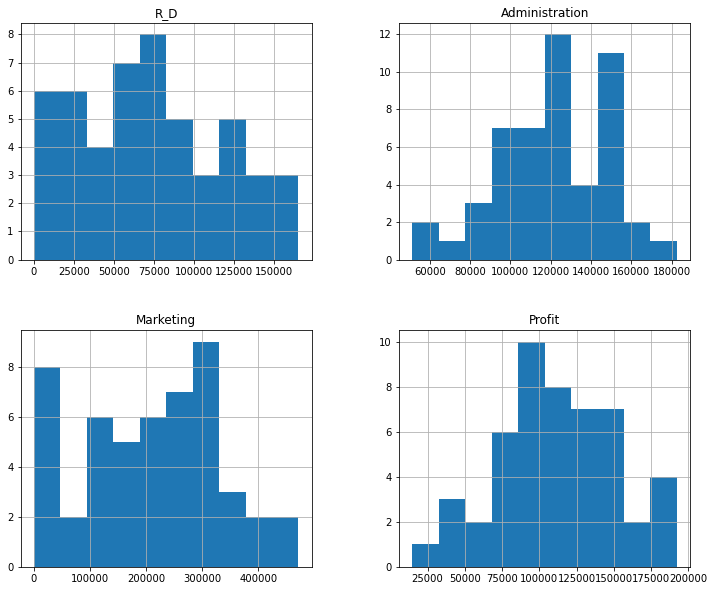

In [58]:
#Veriefier les histogrammes après le centrage et la réduction
df.hist(figsize=(12,10))

## traitement des données 

on connait l'entrée et la sortie de notre jeu de données, on est dans dans un modèle supervisé. On choisit de prendre comme modèle la régression linéaire multiple. Par contre, il faut que TOUTES les features (paramètres) soient des valeurs quantitatives

## Les villes 

Nous pouvons passer à l’étape de modélisation en important le package statsmodels. Deux options s’offrent à nous. (1) La première consiste scinder les données en deux parties : un vecteur contenant les valeurs de la variable cible (exogène) PROFIT, une matrice avec les variables explicatives (exogènes) R&D, Administration, Marketing, Villes. Puis, nous les passons à l’instance de la classe OLS. Cela implique quelques manipulations de données, et surtout de convertir les structures en vecteur et matrice de type numpy. (2) La seconde s’appuie sur une classe spécifique (ols) qui reconnaît directement les formules de type R [ex. la fonction lm() de R]1 . La structure data frame de Pandas peut être directement utilisée dans ce cas. 

###  Option 1 : avec la méthode OneHotEncoder

In [65]:
df_startup = df = pd.read_csv(r'C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\2120d261-1446-43e8-b0eb-a681e66d738a.csv',sep =';')
df_startup.rename(columns ={'R&D': 'R_D'}, inplace =True)



from sklearn.preprocessing import OneHotEncoder
encodage_ville = OneHotEncoder(handle_unknown='ignore')
encodage_ville.fit(df_startup.villes.values.reshape((len(df_startup), 1)))
OneHotEncoder(handle_unknown='ignore')
encodage_ville.categories_
villeOneHot=encodage_ville.transform(df_startup.villes.values.reshape((len(df_startup), 1))).toarray()

In [66]:
villeOneHot 
# on remarque que les villes ont bien été encodées pour  pouvoir être traitées par la suite : 
# [0., 1., 0.]correspond à Paris
#[0., 0., 1.] correspond à Strasbourg
# [1., 0., 0.] correspond à Lyon

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [71]:
# Transformation de la VilleOneHot de numpy.array en pandas.DataFrame 
DfVillesOneHot = pd.DataFrame(data = villeOneHot, columns=encodage_ville.categories_[0])
DfVillesOneHot.head()

,Lyon,Paris,Strasbourg
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [68]:
X,y = df_startup[['R_D','Administration','Marketing']], df_startup['Profit']
X = np.concatenate((X,villeOneHot), axis = 1) # on pourrait aussi utiliser hstack pour obtenir le même résultat
# cela permet de rassembler notre data set de départ en ajoutant l'encodage des villes horizontalement 

In [29]:
### option 2 : avec la méthode StatsModel 

In [30]:
df.columns

Index(['R_D', 'Administration', 'Marketing', 'villes', 'Profit'], dtype='object')

In [31]:
#instanciation
reg = smf.ols(formula='Profit ~ R_D + Administration + Marketing + C(villes) -1 ', data = df_startup)


In [32]:
#Nous utilisons la fonction fit() pour lancer le processus de modélisation à partir des données.
#lancement des calculs
res = reg.fit()
#liste des membres
print(dir(res))
#L’objet res qui en résulte propose également un grand nombre de propriétés et méthodes.

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_to

In [33]:
#summary() affiche le détail des résultats.
#résultats détaillés
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.34e-27
Time:                        11:40:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(villes)[Lyon]        5.032e+

In [34]:
res.pvalues

C(villes)[Lyon]          1.401844e-08
C(villes)[Paris]         5.757175e-09
C(villes)[Strasbourg]    4.444178e-09
R_D                      2.578772e-21
Administration           6.077373e-01
Marketing                1.226769e-01
dtype: float64

In [35]:
# on observe bien que les villes faussent l'analyse car il y'a un pb de multicollinearité. 
# On choisira donc de les enlever par la suite et d'optimiser / travailler notre modèle en utilisant seulement les valeurs
#numériques de départs CAD r&d, marketing et administration

## backward_elimination

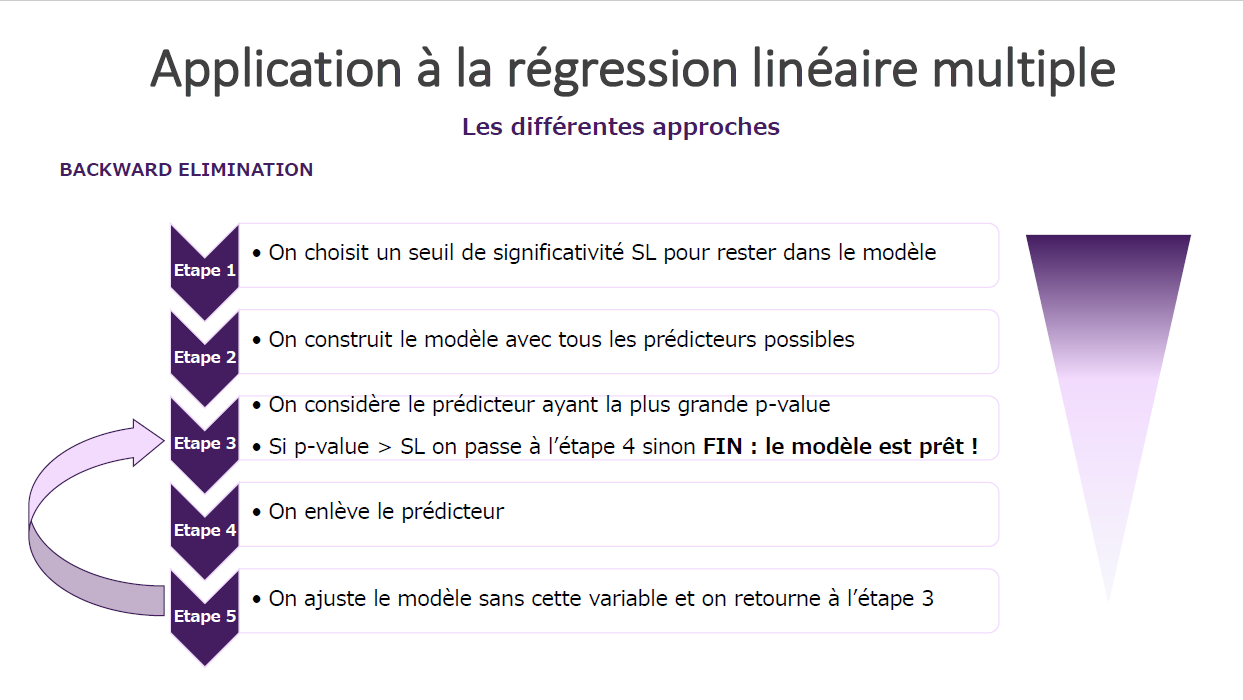

In [2]:
from IPython.display import Image
Image(r"C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\backward_elimination.png")


On part de l'hypothèse qu’H0 est vrai

O n s'accorde une probabilité, un risque acceptable, de rejeter cette hypothèse nulle alors
qu'elle est en fait vraie.

Ce risque d'erreur α est souvent fixé à 5%.

O n calcule ce risque là sur cette étude en particulier , c’est ce qu’on appelle la p value
on dira que l'étude est
statistiquement significative si p < α

### modèle 1

In [37]:
#instanciation
regSV = smf.ols('Profit ~ R_D + Administration + Marketing ', data = df_startup)

In [38]:
#Nous utilisons la fonction fit() pour lancer le processus de modélisation à partir des données.
#lancement des calculs
resSV = regSV.fit()

In [39]:
#résultats détaillés
print(resSV.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.53e-30
Time:                        11:40:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.

### comparaison avec gretl

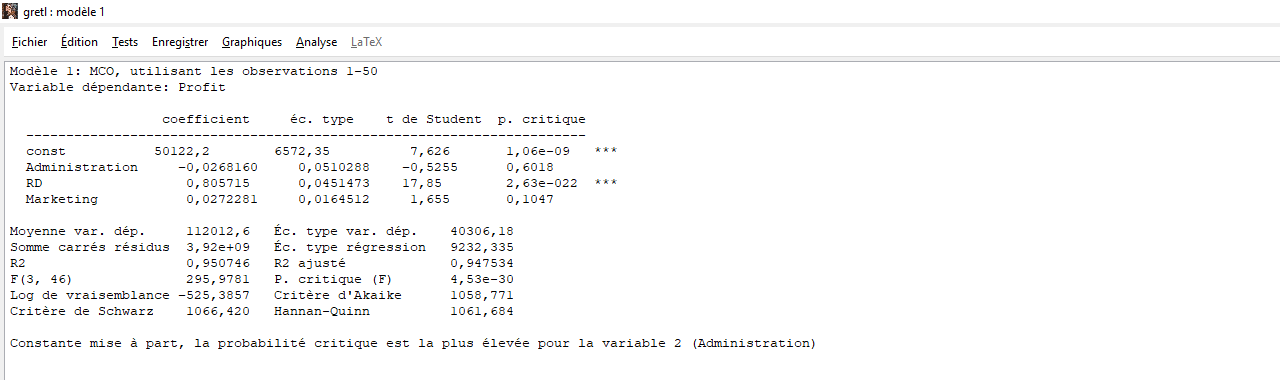

In [83]:
from IPython.display import Image
Image(r"C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\modele1.png")

### modele 2

In [41]:
#instanciation
regSAdm = smf.ols('Profit ~ R_D + Marketing ', data = df_startup).fit()
print(regSAdm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.16e-31
Time:                        11:40:50   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.0

### comparaison avec gretl

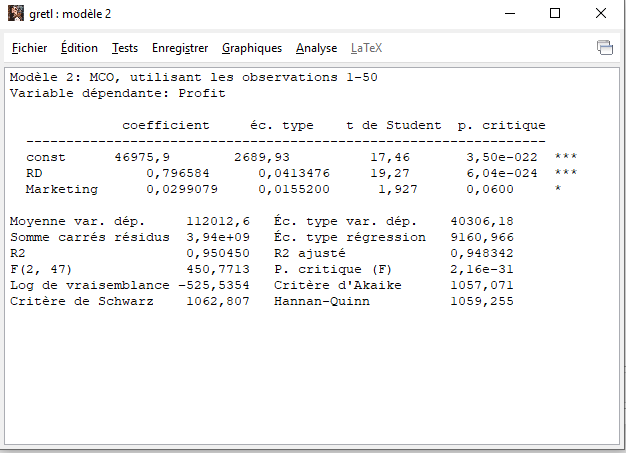

In [81]:
from IPython.display import Image
Image(r"C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\model2.png")

### model 3

In [43]:
regSM = smf.ols('Profit ~ R_D', data = df_startup).fit()
print(regSM.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.50e-32
Time:                        11:40:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.0

### comparaison avec gretl

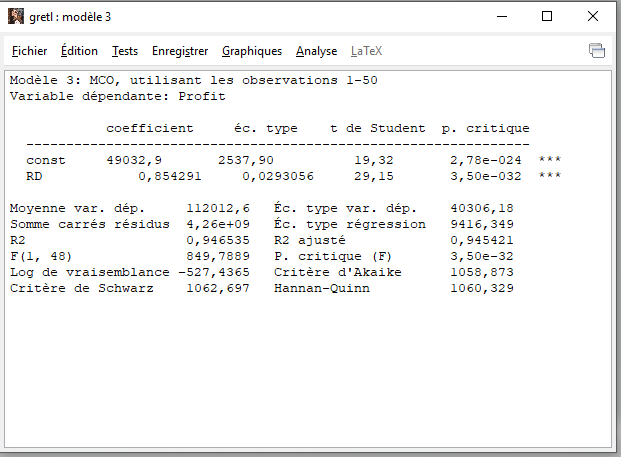

In [80]:
from IPython.display import Image
Image(r"C:\rangement\PROJETS_KAGGLE_SIMPLON\PROJET_LICORNE\data_images\model3.png")

## Analyse

grâce à la méthode backward elimination, on a pu s'apercevoir que le r&d avait un grand impact sur le profit. 
On a chosit de conserver le marketing même si celui ci est légèrement supérieur à la p value fixée au départ. 
En effet en comparant le modèle 2 et le modèle 3 on observe peu d'amélioration et de changement de R^2 adjusted et des critères
comme AIB et BIC 

modèle à 2 variable : R-squared: 0.950, Adj. R-squared: 0.948, AIC: 1057, BIC: 1063.

*On note que le modèle à 2 variables est meilleur car il possède un Adj R² plus grand et un AIC, BIC plus faibles *

# a reflechir encore !

In [45]:
X,y = df_startup[['R_D','Marketing']], df_startup['Profit']
X = np.concatenate((X,villeOneHot), axis = 1)
X

array([[1.6534920e+05, 4.7178410e+05, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.6259770e+05, 4.4389853e+05, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [1.5344151e+05, 4.0793454e+05, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 3.8319962e+05, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.4210734e+05, 3.6616842e+05, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.3187690e+05, 3.6286136e+05, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.3461546e+05, 1.2771682e+05, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [1.3029813e+05, 3.2387668e+05, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.2054252e+05, 3.1161329e+05, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [1.2333488e+05, 3.0498162e+05, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [1.0191308e+05, 2.2916095e+05, 1.0000000e+00, 0.0000000e+00,
        0.00

In [46]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 5)
(10, 5)
(40,)
(10,)


In [47]:
# On passe à l’étape suivante : l’entrainement du modèle ! Enfin 😉
#entrainement du modèle 
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()
#le fit entraine notre modèle
regressor.fit(X_train, y_train)



LinearRegression()

In [48]:
print('Résultat de la phase entraînement: ', regressor.score(X_train, y_train))
print('Résultat de la phase test: ', regressor.score(X_test, y_test))

Résultat de la phase entraînement:  0.9498261378977877
Résultat de la phase test:  0.9446968769428329


In [49]:
#création d' un modèle pouvant prédire les profits.
y_pred = regressor.predict(X_test)

In [50]:
#comparons le profit réel vs le profit prédit  CHANGER SYNTAXE  COMMENRAIRE ET PRINT CAR COPIER COLLER !!!!!!!!!
#numpy.nditer permet d'itérer un array

for i,j in np.nditer((y_test, y_pred)):
    print(i,"   -->   ", j)  

103282.38    -->    101374.28367857904
144259.4    -->    133851.24216012604
146121.95    -->    133300.28408634156
77798.83    -->    72987.32073136016
191050.39    -->    179827.91205675248
105008.31    -->    115491.25395900029
81229.06    -->    69057.74881968743
97483.56    -->    97880.01360638943
110352.25    -->    113898.43875999108
166187.94    -->    169510.7551837419


In [51]:
def coef_determination(y, pred):
    u = ((y-pred)**2).sum() # le résidu de la somme des carrés 
    v= ((y - y.mean())**2).sum()    # somme total des carrés 
    return 1 - u/v

In [60]:
# Les coéfficients du modèle :  Profit = const + coef_1 * R&D + coef_2 * Marketing
"La const =  {:.0f}, le coéfficient de la R&D : {:.3f} et le coéfficient du Marketing : {:.3f}".format(regressor.intercept_, regressor.coef_[0], regressor.coef_[1])

'La const =  46238, le coéfficient de la R&D : 0.785 et le coéfficient du Marketing : 0.034'

#  Sélection du meilleur modèle avec scikit learn
Nous allons utiliser la bibliothèque mlxtend qui utilise scikit learn pour déterminer le meilleur modèle en lui spécifiant la procédure ascendante (Forward) ou descendante (Backward) et le type d'estimateur. Nous avons utiliser la méthode sur notre jeu de données.

In [62]:
#pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


('R_D',)


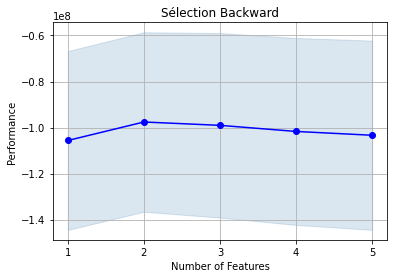

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

X, y = df[['Marketing', 'Administration', 'R_D']], df['Profit']
X = pd.concat([DfVillesOneHot.drop('Lyon', axis=1), X], axis=1)

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
print(sfs.k_feature_names_)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sélection Backward')
plt.grid()

On voit que le modèle le plus approprié est un modèle à deux variables, qu'on détermine en fixant le nombre de variables à deux (k_features=2)

In [75]:
# En utilisant l'attribut .k_feature_names_ on récupère le nom des deux variables à savoir R&D et Marketing

X, y = df[['Marketing', 'Administration', 'R_D']], df['Profit']
X = pd.concat([DfVillesOneHot.drop('Lyon', axis=1), X], axis=1)

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=2, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
print(sfs.k_feature_names_)

('Marketing', 'R_D')


Pour cela, nous allons générer de manière aléatoire un certain nombre de startups avec des dépenses R&D et marketing. Nous allons utiliser une distribution normale construite sur les propriétés de notre jeu de données initial à savoir la moyenne et l'écart type des colonnes R&D et marketing.

>> **La formule utilisée : écart type * distribution normale + moyenne**

In [77]:
# Simulation des données 
nStartups = 100 #nombre de startups simulées 
RandD = df['R_D'].std()*np.random.randn(nStartups)+df['R_D'].mean()
marketing = df['Marketing'].std()*np.random.randn(nStartups)+df['Marketing'].mean()
DF_BPI = pd.DataFrame({'R&D':RandD, 'Marketing': marketing})

#En utilisant notre modèle à 2 variables, nous allons calculer le profit prédit, puis nous ordons les starups en fonction
#du profit et ainsi on aura le classement des startups les plus profitable.

DF_BPI ['Profit_pred'] = regressor.intercept_ \
                       + regressor.coef_[0] * DF_BPI['R&D'] + \
                       + regressor.coef_[1] * DF_BPI['Marketing']
print("Selon le modèle, les startups qui seront le plus profitable sont", DF_BPI.sort_values(['Profit_pred'], ascending=False).head().index.tolist() )
DF_BPI.sort_values(['Profit_pred'], ascending=False).head()       

Selon le modèle, les startups qui seront le plus profitable sont [57, 7, 14, 97, 16]


,R&D,Marketing,Profit_pred
57,175585.106273,270348.306001,193277.704294
7,164763.870396,208517.666087,182681.954488
14,164273.829239,162527.520050,180735.542830
97,146665.512517,336283.631493,172810.651230
16,146397.534950,327660.881653,172307.453299


In [78]:
DF_BPI ['Profit_pred'] = round(regressor.intercept_ \
                       + regressor.coef_[0] * DF_BPI['R&D'] + \
                       + regressor.coef_[1] * DF_BPI['Marketing'], 2)
print("Selon le modèle, les startups qui seront le plus profitable sont", DF_BPI.sort_values(['Profit_pred'], ascending=False).head().index.tolist() )
DF_BPI.sort_values(['Profit_pred'], ascending=False).head()  

Selon le modèle, les startups qui seront le plus profitable sont [57, 7, 14, 97, 16]


,R&D,Marketing,Profit_pred
57,175585.106273,270348.306001,193277.70
7,164763.870396,208517.666087,182681.95
14,164273.829239,162527.520050,180735.54
97,146665.512517,336283.631493,172810.65
16,146397.534950,327660.881653,172307.45


In [54]:
from ipywidgets import HBox, VBox, Label


wd_RD = widgets.FloatText()
wd_admin = widgets.FloatText()
wd_market = widgets.FloatText()
btn = widgets.Button(description = 'Evaluer')
wd_result = widgets.FloatText(disabled=True)

left_box = VBox([Label('budget R&D : '),
                Label('budget Administration : '),
                Label('budget Marketing : '),
                Label(''),
                Label(''),
                Label('Profit estimé : ')
                ])
right_box = VBox([wd_RD,
                wd_admin,
                wd_market,
                btn,Label(''),
                wd_result])

layout = HBox([left_box, right_box])

display(layout)


def predict(b):
    #Récupération des valeurs des widgets
    R_D = int(wd_RD.value)
    admin = int(wd_admin.value)
    market = int(wd_market.value)
    tot = R_D + admin + market
    prct_admin = round(100 * admin  / tot, 2)

    #Construction de la dataframe de test avec les trois valeurs
    df_test = pd.DataFrame({'R_D':[R_D],
                            'Marketing':[market],
                            'Administration':[admin],
                            'prct_Administration':[prct_admin]
                            })

    #On appelle les prédictions
    pred = regSM.predict(df_test)

    #Récupération de la première valeur des prédictions (il n'y en a qu'une)
    wd_result.value = round(pred[0],0)

btn.on_click(predict)